In [120]:
import requests, bs4, time, os
import numpy as np

In [121]:
well_api_number=[30015215980000,30015256300000]


In [123]:
number_of_files=[]
for well in well_api_number:
    newpath = ((r'D:/NM logs/%s') % (well)) 
    if not os.path.exists(newpath): os.makedirs(newpath)
    response1 = requests.get('http://ocdimage.emnrd.state.nm.us/imaging/WellFileView.aspx?RefType=WF&RefID='+str(well)) #scrapes the individual well docs page
    soup2=bs4.BeautifulSoup(response1.text, "lxml")
    links=[]
    for a in soup2.find_all('a', href=True):
        links.append(a['href'])
    links=links[8:-3]
    number_of_files.append(len(links))
    for i in range(len(links)-1):
        try:
            r=requests.get(links[i])
            with open('D:/NM logs/'+str(well)+'/file'+str(i)+'.pdf',"wb") as pdf:
                for chunk in r.iter_content(chunk_size=1024):
                    if chunk:
                        pdf.write(chunk)
        
        except:
            pass

In [167]:
from __future__ import print_function
from wand.image import Image

for well in range(len(well_api_number)):
    for items in range(number_of_files[well]-1):
        with Image(filename='D:/NM logs/'+str(well_api_number[well])+'/file'+str(items)+'.pdf', resolution=300) as img:
            print('pages = ', len(img.sequence))
            with img.convert('jpg') as converted:
                converted.save(filename='D:/NM logs/'+str(well_api_number[well])+'/page-'+str(items)+'.jpg')

pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  2
pages =  1
pages =  1
pages =  1
pages =  1
pages =  2
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  3
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  4
pages =  3
pages =  3
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  5
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  1
pages =  2
pages =  1
pages =  1
pages =  1
pages =  2
pages =  3
pages =  5
pages =  5
pages =  1
pages =  2
pages =  2
pages =  1
pages =  3
pages =  5
pages =  2


In [170]:
import pytesseract
from PIL import Image
tessdata_dir_config = '--tessdata-dir "C:\\Program Files (x86)\\Tesseract-OCR\\tessdata"'

documents=[]

for well in range(len(well_api_number)):
    for items in range(number_of_files[well]-1):
        try:
            text=pytesseract.image_to_string(Image.open('D:/NM logs/'+str(well_api_number[well])+'/page-'+str(items)+'.jpg').convert('L'),config=tessdata_dir_config)
            documents.append(text)
        except:
            try:
                for i in range(10):
                    text=pytesseract.image_to_string(Image.open('D:/NM logs/'+str(well_api_number[well])+'/page-'+str(items)+'-'+str(i)+'.jpg').convert('L'),config=tessdata_dir_config)
                    documents.append(text)
            except:
                pass
            

In [171]:
documents[2]

u'Jaw 62/5- 2/57?\n\n \n\n  \n \n\n \n\n \n\n \n\nDEUCEBILE\'B NEW MEXICO OIL C0NSERVA\xa70ECE\xa71MIESS\xa7DNV )brm (xxm\nSANTA FE ~ E D\u2019 Hevmm H\u2014as\nFILE SA. lndi~(:u\\n Type of Letty}:-\n\n \n\nJUL 2 9 1975 39m\u201d\n\n\u2018l3.CLl3. "\u2018 \u2018 \u201d \' ""\u201c\u2019\\\\\nAPPLICATION FOR\u2018PERMIT TO DRILL, DEEPEN, OR PLi\u2019 \u201c5\u20181 KDFFIC: \\ .__ \ufb02 _,,\n\n[1.5.6 .5.\n\n \n\n\u2018 LAND OFFICE\nOPERATOR\n\n \n\n \n\n \n\n \n\n \n\n \n\nWM\nla. Type of Work 7. Unit Aqrmnneni Nunv;\nDRILL . DEEPEN PLUG BACK\nb. Type of Wall E] [:1 8. Hum or men Name:\n3%\u201d Ed :21.. [:1 \u201c22:: [:1 ""\u201c2\'2: [:1 Spurck \'1\u2018\u201d s ta te\n2. Name 0! ()pcmmr 9. Well No.1 \u2014\ns. P. Yatesw\u2014 5\n3. Address of Operator 10. l\u2018lc-M and Paul, or Wildcat\n207 South 4th Street ~ Artesia, NM 88210 Red Lake\n\n \n\ni: :::::::::-\u2014-\u2014  *:\xb0.::\':::"\u2014\u2014i\u201d36 :::i\u2014\u2014* g: \\\\\\\n\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\u201c\n\n \n

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(stop_words='english')
%time X = vectorizer.fit_transform(documents)

Wall time: 81 ms


In [178]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1)
%time data=model.fit(X)

Wall time: 9 ms


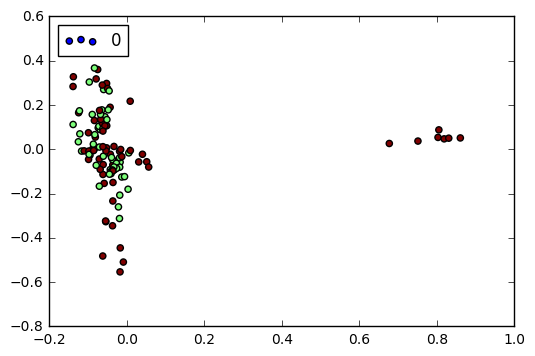

In [179]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2).fit(X.toarray())
data2D = pca.transform(X.toarray())

plt.scatter(data2D[:,0], data2D[:,1],c=data.labels_, cmap='jet', label=data.labels_)
plt.legend((data.labels_), loc=2)

In [197]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
punctuations = ['(',')',';',':','[',']',',', '.', '_', '~', '...']
stop_words = stopwords.words('english')
all_keys=[]
for i in range(len(documents)):
    tokens = word_tokenize(documents[i])
    keywords = [word for word in tokens if not word in stop_words and  not word in punctuations]
    all_keys.append(keywords)

In [199]:
from nltk.corpus import words

final=[]
for x in all_keys:
    if x in words.words():
        final.append(x)
print(final)

[]


In [189]:
from autocorrect import spell
spell("yates")


'yates'

In [267]:
clean_keys=[]
for j in range(3):
    hot=[]
    for i in range(len(all_keys[j])):
        if spell(all_keys[j][i]).lower() in words.words() and not stop_words:
            hot.append(spell(all_keys[j][i]).lower())
    clean_keys.append(hot)
        

In [268]:
tested=' '.join(clean_keys[2])
print(tested)

In [260]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(stop_words='english')
%time X = vectorizer.fit_transform(clean_keys)

AttributeError: 'list' object has no attribute 'lower'

In [259]:
documents[1]

u'\\\\\n\nNE... ,msxtco 05L CONSERVATION COMMISSIL..\nWELL LOCATION AND ACREAGE DEDICATION PLAT\n\ntbnn (7 ~102\nSupcrs vdus (.3128\n\n[Effective 1-1-65\n\nAH dlslunces must he (mm the outor houndnrh s of the Sn-ction.\n\n[pbPSPURCK\u201c?\u201d\nDXXT \u2018\n\n1mm 1%}:\u201c471 4\nm\xe9ga\ufb01\n\xa31;\n\n\u20189 15%\nPmJuCinq Formation\n\nAggy\nGroumli\'vac-l zlluv. I 001 Dodxratvd Acronqo:\n33 4 0 San Andres Red Lake 5/0\n\n1. Outline the acreage dedicated to the subject well by colored pencil 0r huchure marks on the plat below,\n\n \n\n \n\n    \n  \n \n\nOperntm 3. .\n\n2ng \xa7?-\n\nnn [Lv-W -r Soctlin\n\nA [\xe9\n\nActual 1\u20190:thqu Location of Well:\n\n/(\'\n\n    \n  \n\n \n    \n  \n \n  \n\n  \n\n  \n   \n   \n \n\n \n\n  \n\n(Pet {mm the llne\n\n164:5? \u2019\n\n10m (mm the line (mi\n\nAcres\n\n \n\n2. If more than one lease is dedicated to the well, outline each and identify the ownership thereof (holh us to working\ninterest and royalty).\n\n3. If more than one lease o